In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the fraud detection dataset
data = pd.read_csv('Fraud_Detection.csv')

# Display the first five rows of the dataset
data.head()

ModuleNotFoundError: No module named 'pandas'

In [5]:
# Get the shape of the dataset (rows, columns)
data.shape

NameError: name 'data' is not defined

In [6]:
# Check for missing values in the dataset
data.isnull().sum()

NameError: name 'data' is not defined

In [7]:
# Display a concise summary of the DataFrame
# This includes the column names, data types, and number of non-null entries
data.info()

NameError: name 'data' is not defined

In [7]:
# Generate descriptive statistics for the numeric columns in the DataFrame
# This includes count, mean, std deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Identify columns with categorical data (object type)
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# Identify columns with integer data (int type)
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# Identify columns with float data (float type)
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [9]:
# Get the count of each unique value in the 'isFraud' column
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [55]:
# Get the count of each unique value in the 'isFlaggedFraud' column
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


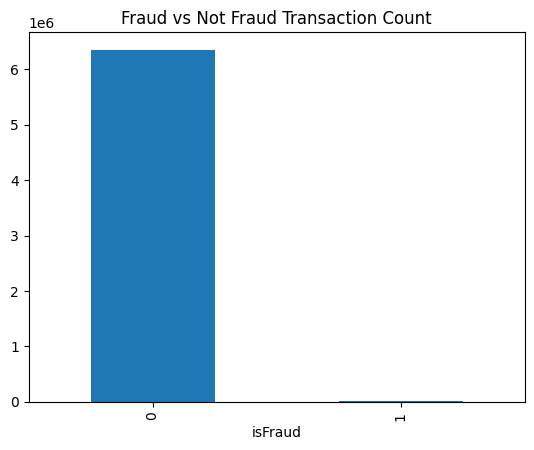

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

In [56]:
# Value Count of  Fraud vs No Fraud  Transaction
data['isFraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Not Fraud Transaction Count')
plt.show()

# Percentage of fraudulent transactions
fraud_ratio = data['isFraud'].value_counts(normalize=True) * 100
print(fraud_ratio)

# Save the plot as an image file
plt.savefig('Fraud.png')

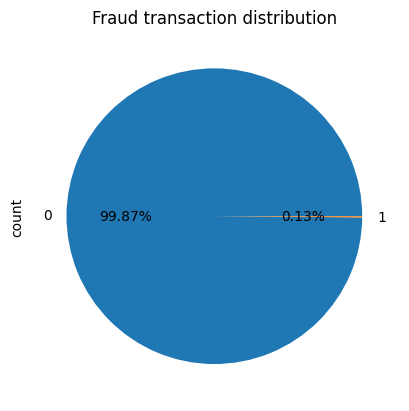

In [57]:
#Pie chart for target variable distribution
plt.title('Fraud transaction distribution')
data['isFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%')
# Save the plot as an image file
plt.savefig('Fraud_per.png')

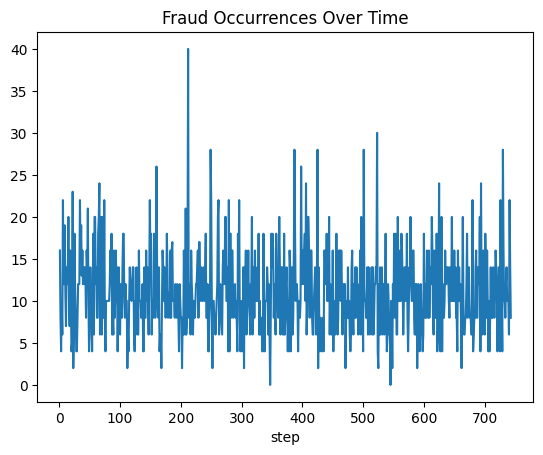

In [58]:
#Fraud Occurrences Over Time
plt.title('Fraud Occurrences Over Time')
data.groupby('step')['isFraud'].sum().plot(kind='line')
# Save the plot as an image file
plt.savefig('Fraud_hour.png')

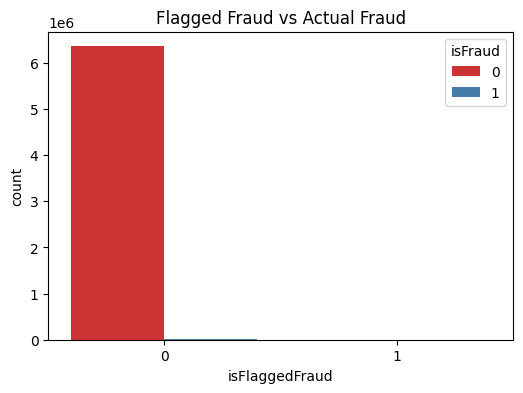

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot isFlaggedFraud against isFraud

plt.figure(figsize=(6,4))
sns.countplot(x='isFlaggedFraud', hue='isFraud', data=data, palette='Set1')
plt.title('Flagged Fraud vs Actual Fraud')
plt.show()

# Save the plot as an image file
plt.savefig('Fraud_vs_ActualFraud.png')

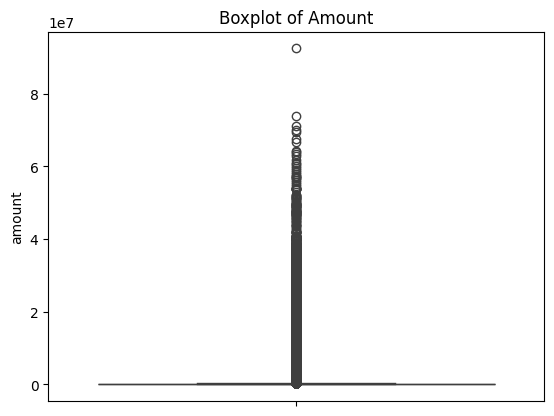

In [60]:
# Boxplot for a specific column
sns.boxplot(data['amount'])
plt.title('Boxplot of Amount')
plt.show()

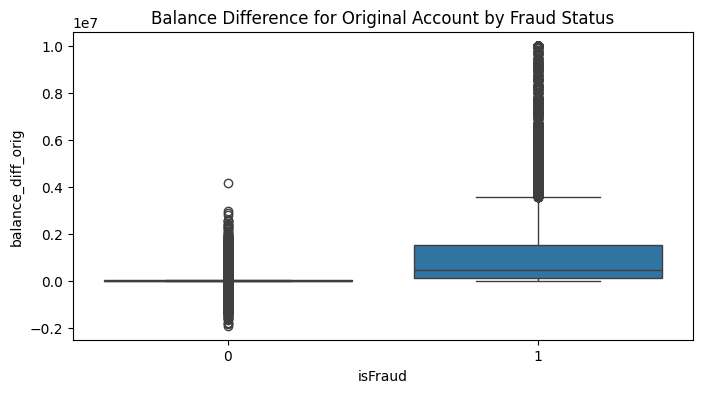

<Figure size 640x480 with 0 Axes>

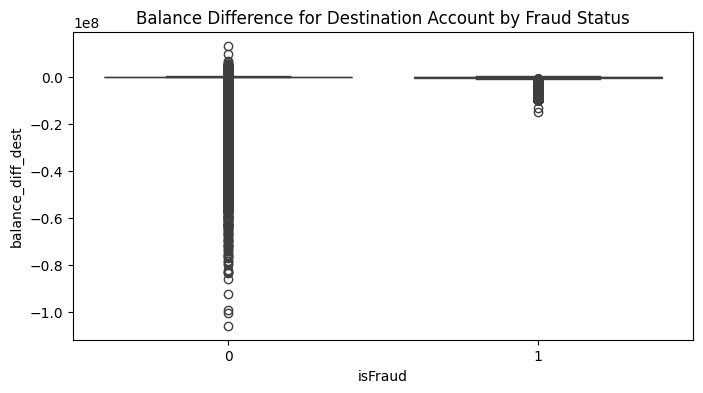

<Figure size 640x480 with 0 Axes>

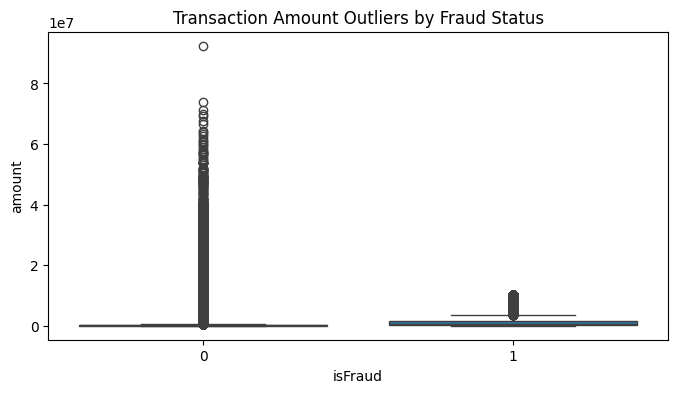

<Figure size 640x480 with 0 Axes>

In [61]:
# Create balance difference features
data['balance_diff_orig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_dest'] = data['oldbalanceDest'] - data['newbalanceDest']

# Boxplot for balance difference in original account to detect anomalies
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='balance_diff_orig', data=data)
plt.title('Balance Difference for Original Account by Fraud Status')
plt.show()

# Save the plot as an image file
plt.savefig('Balance Difference_by_OA.png')

# Boxplot for balance difference in destination account to detect anomalies
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='balance_diff_dest', data=data)
plt.title('Balance Difference for Destination Account by Fraud Status')
plt.show()

# Save the plot as an image file
plt.savefig('Balance Difference_by_DA.png')


# Identifying outliers in transaction amount using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount Outliers by Fraud Status')
plt.show()
# Save the plot as an image file
plt.savefig('TransactionAmount_by_FS.png')

In [10]:
#Diff of Orig and Dest
data['balance_diff_orig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_dest'] = data['oldbalanceDest'] - data['newbalanceDest']

data[data['isFraud'] == 1][['balance_diff_orig', 'balance_diff_dest']].describe()
data[data['isFraud'] == 0][['balance_diff_orig', 'balance_diff_dest']].describe()

,balance_diff_orig,balance_diff_dest
count,6.354407e+06,6.354407e+06
mean,-2.314152e+04,-1.235048e+05
std,1.062233e+05,8.104223e+05
min,-1.915268e+06,-1.056878e+08
25%,0.000000e+00,-1.489826e+05
50%,0.000000e+00,0.000000e+00
75%,1.010213e+04,0.000000e+00
max,4.164236e+06,1.306083e+07


In [11]:
# Descriptive statistics for transaction amounts and balances
desc_stats = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()
print(desc_stats)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  6.362620e+06   6.362620e+06    6.362620e+06    6.362620e+06   
mean   1.798619e+05   8.338831e+05    8.551137e+05    1.100702e+06   
std    6.038582e+05   2.888243e+06    2.924049e+06    3.399180e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.338957e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.487194e+04   1.420800e+04    0.000000e+00    1.327057e+05   
75%    2.087215e+05   1.073152e+05    1.442584e+05    9.430367e+05   
max    9.244552e+07   5.958504e+07    4.958504e+07    3.560159e+08   

       newbalanceDest  
count    6.362620e+06  
mean     1.224996e+06  
std      3.674129e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.146614e+05  
75%      1.111909e+06  
max      3.561793e+08  


In [64]:
#Sort Value Count of Type
data.type.value_counts().sort_values()

,count
type,
DEBIT,41432
TRANSFER,532909
CASH_IN,1399284
PAYMENT,2151495
CASH_OUT,2237500


In [65]:
import plotly.express as px

# Calculate value counts for transaction types
type_counts = data['type'].value_counts().sort_values()

# Transaction Type Distribution using Plotly Pie Chart
fig2 = px.pie(
    data_frame=type_counts,
    values=type_counts.values,
    names=type_counts.index,
    title='Distribution of Transaction Type',
    color=type_counts.index,
    color_discrete_sequence=px.colors.sequential.Viridis_r,
    height=500
)

# Display the pie chart
fig2.show()
# Save the plot as an image file
plt.savefig('value counts for transaction types.png')

<Figure size 640x480 with 0 Axes>

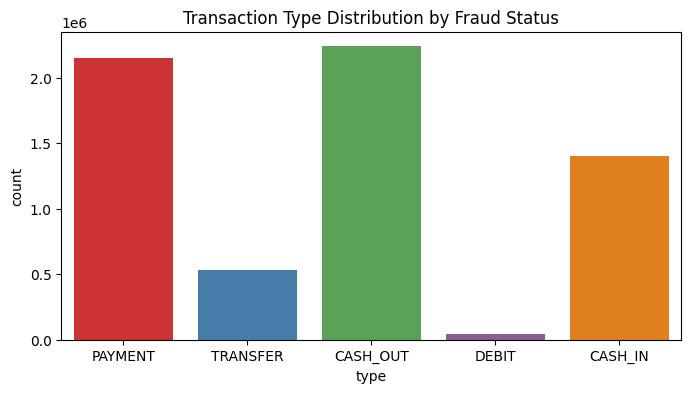

<Figure size 640x480 with 0 Axes>

In [66]:
# Fraud by transaction type (with hue correction)
plt.figure(figsize=(8,4))
sns.countplot(x='type', hue='type', data=data, palette='Set1', legend=False)
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()
plt.savefig('Transaction Type Distribution.png')

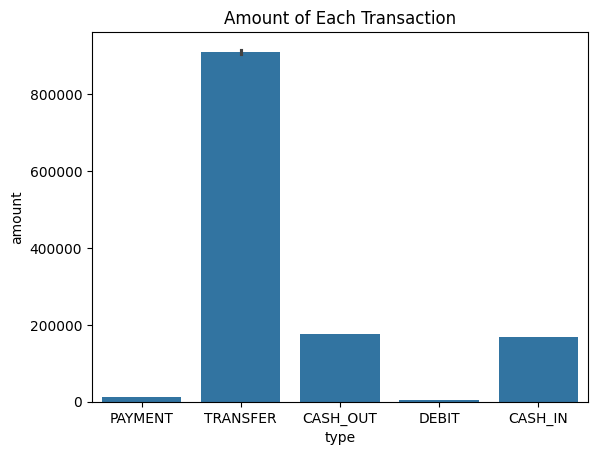

In [67]:
# amount of each transaction
plt.title('Amount of Each Transaction')
sns.barplot(x='type', y='amount', data=data)
plt.savefig('AmountbyType.png')

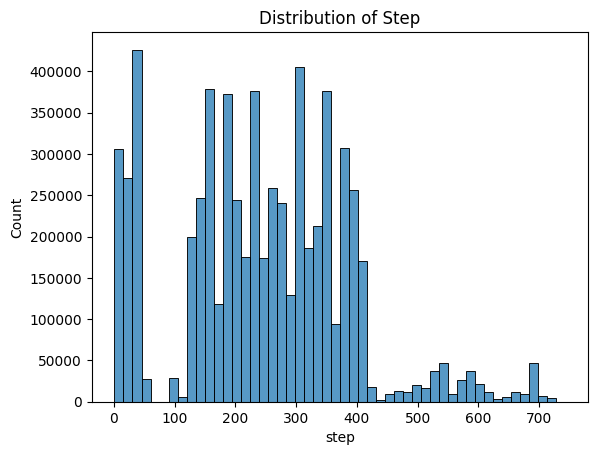

In [68]:
# Plot the distribution of 'step' values in the dataset
# 'step' represents the time unit in the dataset, with each step being one hour
plt.title('Distribution of Step')
sns.histplot(data['step'], bins=50)  # Create a histogram with 50 bins

# Save the plot as an image file
plt.savefig('Step.png')

# Display the plot
plt.show()

In [69]:
# Most frequent fraudsters and recipients in fraudulent transactions
print(data[data['isFraud'] == 1]['nameOrig'].value_counts().head())
print(data[data['isFraud'] == 1]['nameDest'].value_counts().head())

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
Name: count, dtype: int64
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
Name: count, dtype: int64


In [14]:

# Select only the numeric columns for the correlation matrix
data_numeric= data.select_dtypes(include=['float64', 'int64'])

# Drop the original 'type' column
#data_numeric = data.drop(columns=['nameOrig', 'nameDest'])


# Calculate the correlation matrix for the cleaned data
correlation = data_numeric.corr()

# Display the correlation with 'isFraud'
print(correlation['isFraud'].sort_values(ascending=False))

isFraud              1.000000
balance_diff_orig    0.362472
amount               0.076688
isFlaggedFraud       0.044109
step                 0.031578
oldbalanceOrg        0.010154
newbalanceDest       0.000535
oldbalanceDest      -0.005885
newbalanceOrig      -0.008148
balance_diff_dest   -0.027028
Name: isFraud, dtype: float64


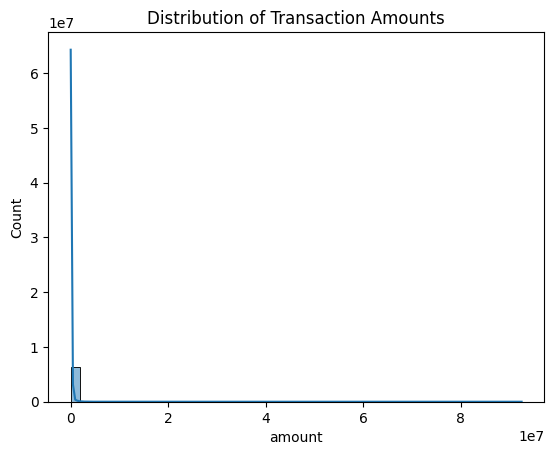

<Figure size 640x480 with 0 Axes>

In [71]:
# Distribution of transaction amounts
sns.histplot(data['amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()
plt.savefig('Distribution of Transaction Amounts.png')


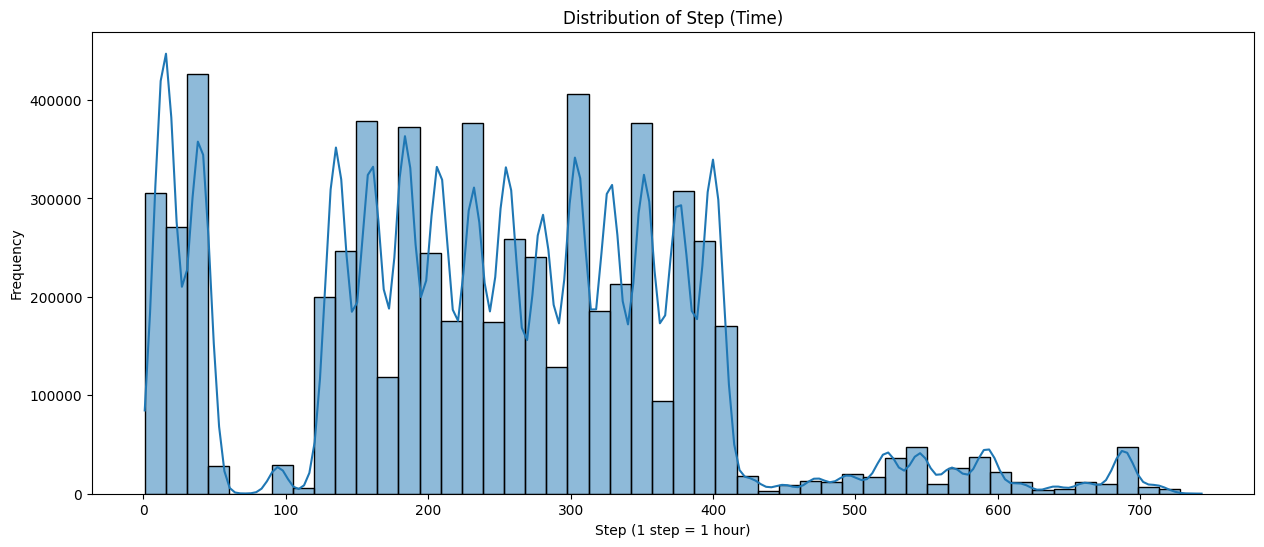

<Figure size 640x480 with 0 Axes>

In [72]:
# Create the plot Distribution of Step (Time)
plt.figure(figsize=(15, 6))

# Use histplot instead of distplot
sns.histplot(data['step'], bins=50, kde=True)

# Set title and labels
plt.title('Distribution of Step (Time)')
plt.xlabel('Step (1 step = 1 hour)')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Distribution of Step.png')

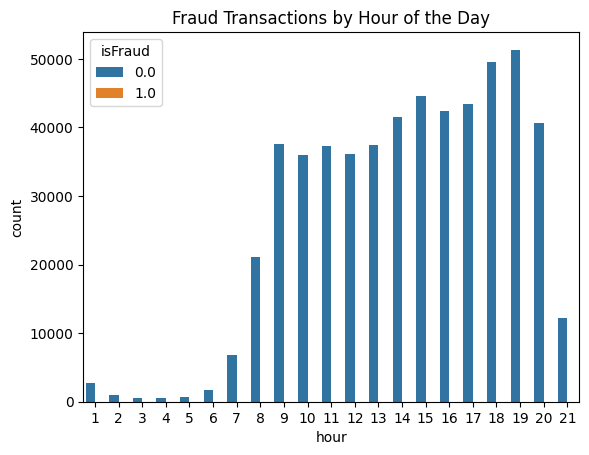

<Figure size 640x480 with 0 Axes>

In [28]:
# Convert 'step' into actual time features (day, hour, etc.)
data['hour'] = data['step'] % 24
sns.countplot(x='hour', hue='isFraud', data=data)
plt.title('Fraud Transactions by Hour of the Day')
plt.show()
plt.savefig('Fraud Transactions by Hour of the Day.png')

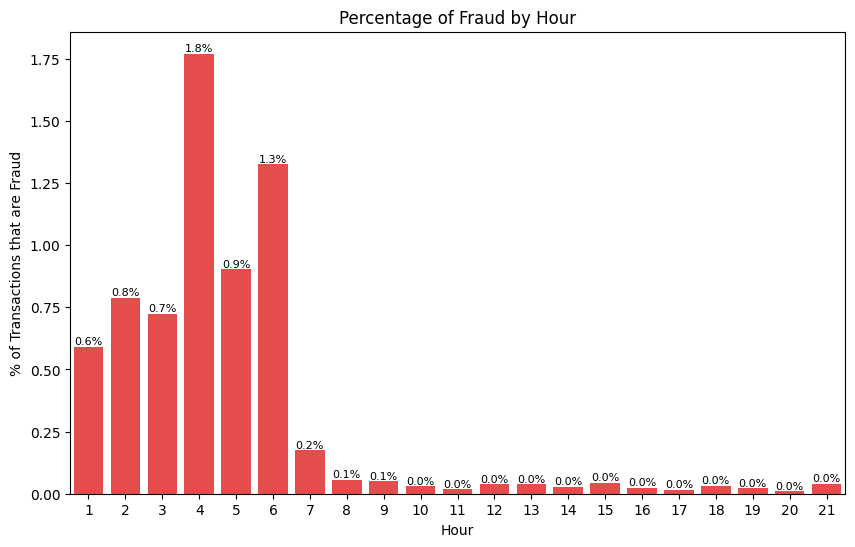

In [29]:
#Transactions that are Fraud By Hour
data['hour'] = data['step'] % 24
fraud_percentage_by_hour = (data[data['isFraud'] == 1]['hour'].value_counts() / data['hour'].value_counts()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_hour.index, y=fraud_percentage_by_hour.values, color='red', alpha=0.8)

plt.xlabel('Hour')
plt.ylabel('% of Transactions that are Fraud')
plt.title('Percentage of Fraud by Hour')

for index, value in enumerate(fraud_percentage_by_hour):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
plt.savefig('FruadByHour.png')

In [17]:
import plotly.express as px
# Correlation between isFraud feature with other features
# df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].iplot(kind='bar')
fig1 = px.bar(x=data.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].index, y=data.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].values,
              color=data.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].index, color_discrete_sequence=px.colors.sequential.Viridis_r,
              text=data.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].values, title='Target Feature (isFraud) Correlation Plot')
fig1.update_xaxes(title_text='Features')
fig1.update_yaxes(title_text='Correlation')
plt.savefig('CorrelationPlot.png')

<Figure size 640x480 with 0 Axes>

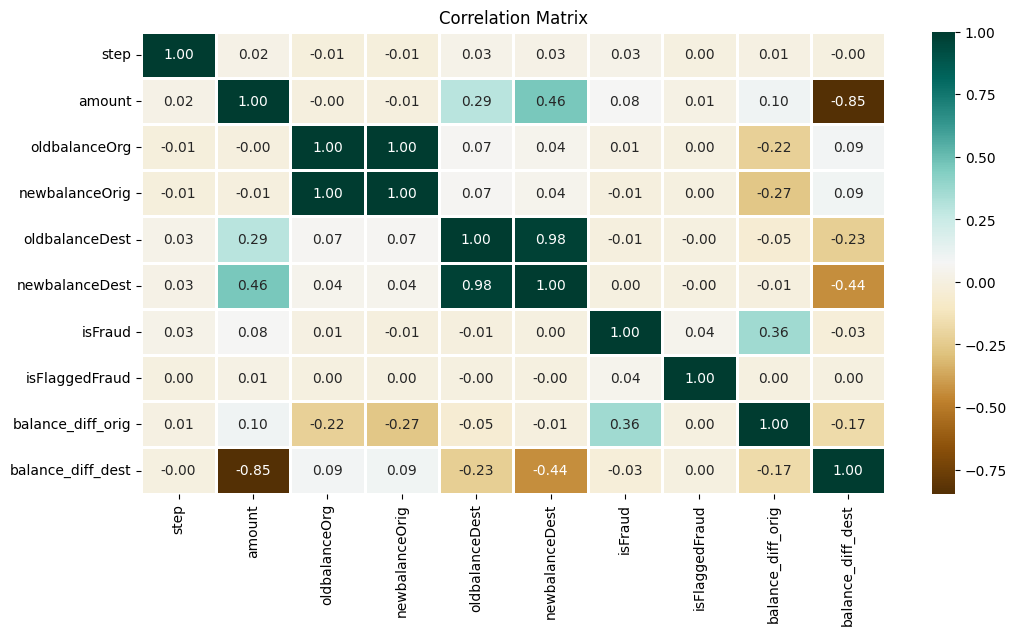

<Figure size 640x480 with 0 Axes>

In [15]:
# Select only the numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation matrix.png')

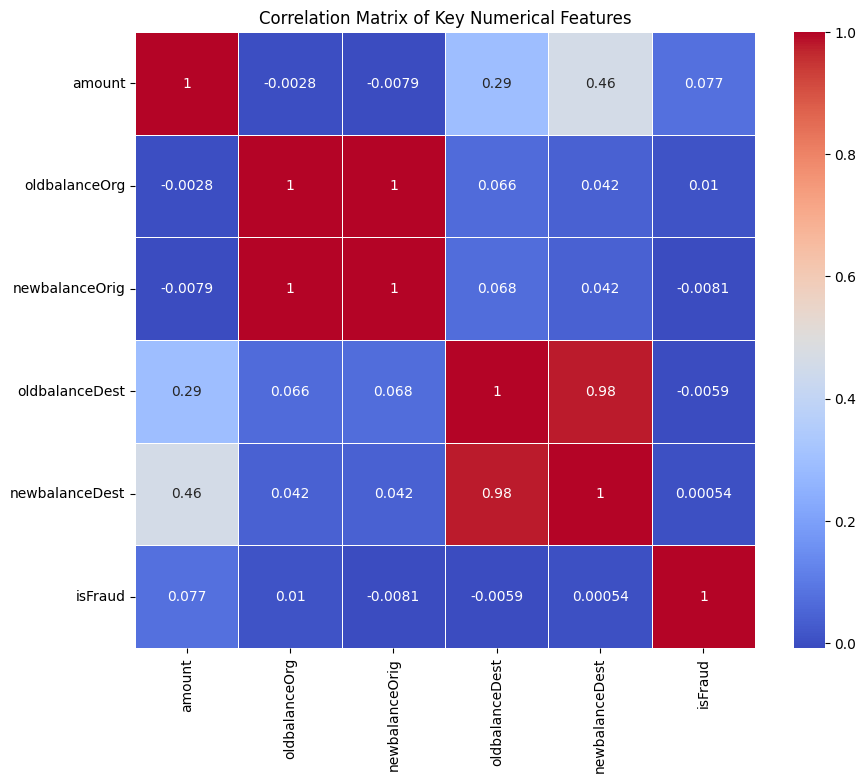

<Figure size 640x480 with 0 Axes>

In [16]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10,8))
corr_matrix = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()
plt.savefig('correlation matrix2.png')